In [1]:
import json
import geocoder
import time
from dotenv import load_dotenv
import os
import geopandas as gpd
import pandas as pd
import os
import time
from shapely.geometry import Point

In [2]:
df = pd.read_csv('data/raw/LiveXYZ-July-17-2025.csv')

In [3]:
df.columns

Index(['stateId', 'spaceStatus', 'placeStatus', 'resolvedName',
       'subcategoriesPrimary.name', 'address', 'postcode',
       'validityTime.start', 'validityTime.end', 'verifiedTimesLast',
       'verifiedTimes', 'placeId', 'placeCreationDate', 'spaceId',
       'spaceCreationDate', 'entrances.main.lat', 'entrances.main.lon',
       'entrances.main.floor', 'entrances.main.entranceMethod', 'hours', 'tel',
       'emails', 'urls.website', 'urls.facebook', 'urls.instagram',
       'urls.menu', 'urls.contact', 'urls.liveWeb', 'slug', 'description',
       'name', 'genericName.id', 'genericName.name', 'chain.chainId',
       'chain.name', 'chain.urls.website', 'parent.placeId', 'parent.name',
       'parent.subcategoriesPrimary.id', 'parent.subcategoriesPrimary.name',
       'tagsPrimary.id', 'tagsPrimary.name', 'subcategoriesPrimary.id',
       'categoriesPrimary.id', 'categoriesPrimary.name', 'tags.id',
       'tags.name', 'subcategories.id', 'subcategories.name', 'categories.id',
   

In [4]:
geometry = [Point(xy) for xy in zip(df['entrances.main.lon'], df['entrances.main.lat'])]

In [5]:
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [6]:
gdf.set_crs(epsg=4326, inplace=True)

,stateId,spaceStatus,placeStatus,resolvedName,subcategoriesPrimary.name,address,postcode,validityTime.start,validityTime.end,verifiedTimesLast,...,subcategories.id,subcategories.name,categories.id,categories.name,offerings.positive.id,offerings.positive.name,isStorefront,isInterior,isMobile,geometry
0,59c10a8f7b2a366c731cf1cd,Occupied,Operating,Achilles Heel,Restaurant,180 West St,11222.0,2015-03-24T19:44:57Z,NaN,2025-06-03T19:48:26Z,...,"5511be633d42bd000300064e,5511be4f3d42bd00030005f4","Restaurant,Bar","59ea276af86351000446c403,59ea28d4f86351000446c55f","Food,Drinks",56dc73c2c55a626ccde58419,Dine In,True,False,False,POINT (-73.95971 40.7332)
1,59c10a907b2a366c731cf27e,Occupied,Operating,Troost,Bar,1011 Manhattan Ave,11222.0,2015-03-24T19:45:23Z,NaN,2025-06-03T22:45:24Z,...,"5511be4f3d42bd00030005f4,58193a7c1c464c000357b1c8","Bar,Groceries & Convenience","59ea28d4f86351000446c55f,59ea28b3f86351000446c544","Drinks,Essentials",55439a661e972b000300006e,Outdoor Patio,True,False,False,POINT (-73.95494 40.73346)
2,59c10a907b2a366c731cf233,Occupied,Operating,Lake Street,Bar,706 Manhattan Ave,11222.0,2015-03-24T19:45:25Z,NaN,2025-06-02T22:14:15Z,...,5511be4f3d42bd00030005f4,Bar,59ea28d4f86351000446c55f,Drinks,5511be5e3d42bd0003000635,Outdoor Seating Area,True,False,False,POINT (-73.95179 40.72571)
3,59c10a907b2a366c731cf2a5,Occupied,Operating,Keg & Lantern,Bar,97 Nassau Ave,11222.0,2015-03-24T19:45:57Z,NaN,2025-04-25T21:30:07Z,...,"5511be4f3d42bd00030005f4,56dc73c2c55a626ccde58...","Bar,Breweries, Wineries & Farms,Restaurant","59ea28d4f86351000446c55f,5a45309f38690d0004003...","Drinks,Arts & Culture,Food","5511be4037345d00030005e0,55439a661e972b0003000...","Jukebox,Outdoor Patio,Dine In",True,False,False,POINT (-73.95034 40.72401)
4,59c10a917b2a366c731cf357,Occupied,Operating,Spritzenhaus,Restaurant,33 Nassau Ave,11222.0,2015-03-24T19:46:17Z,NaN,2025-06-02T21:32:56Z,...,"5511be633d42bd000300064e,5511be4f3d42bd00030005f4","Restaurant,Bar","59ea276af86351000446c403,59ea28d4f86351000446c55f","Food,Drinks","5511be4937345d000300060a,56dc73c2c55a626ccde58...","Board Games,Dine In,Fireplace,Jenga,Sidewalk S...",True,False,False,POINT (-73.95272 40.72322)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,685340eef8b6e7f7990be214,Unoccupied,NaN,NaN,NaN,338 McGuinness Blvd,11222.0,2025-06-18T22:42:52Z,NaN,2025-06-18T22:42:53Z,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,POINT (-73.95208 40.73409)
1248,68534126f8b6e7f7990be221,Unoccupied,NaN,NaN,NaN,237 Mcguinness Blvd,NaN,2025-06-18T22:43:48Z,NaN,2025-06-18T22:43:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,POINT (-73.95169 40.73021)
1249,6854ae5352b41dbe68fbd8c3,Occupied,Operating,Apollo,"Laundry, Cleaners & Tailors",137 Franklin St,NaN,2025-06-20T00:41:53Z,NaN,2025-06-20T00:41:54Z,...,58193c3e862a8200030b8857,"Laundry, Cleaners & Tailors",59ea2934f86351000446c5ee,Services,NaN,NaN,True,False,False,POINT (-73.9579 40.73096)
1250,685ca13c9aa3b1ce27e543e4,Occupied,Coming Soon,Dime,Banks & Atms,742-44 Manhattan Ave,11222.0,2025-06-26T01:24:09Z,NaN,2025-06-26T01:24:10Z,...,56dc73c2c55a626ccde58429,Banks & Atms,59ea2934f86351000446c5ee,Services,NaN,NaN,True,False,False,POINT (-73.9522 40.72647)


<Axes: >

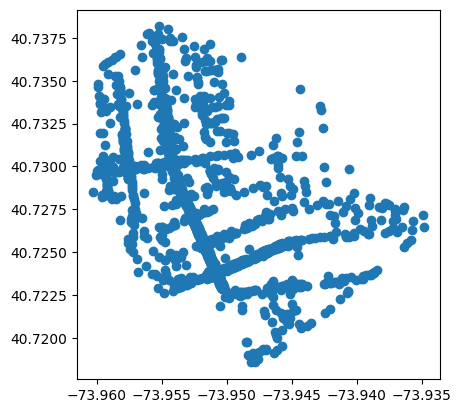

In [7]:
gdf.plot()

In [8]:
gdf.to_file('data/processed/shops.geojson')

In [9]:
blocks = gpd.read_file('data/processed/greenpoint_block.geojson')

<Axes: >

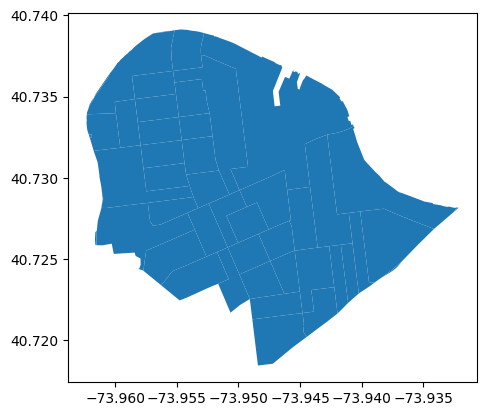

In [10]:
blocks.plot()

In [11]:
joined = gpd.sjoin(gdf, blocks, how="left", predicate="within")

In [12]:
len(joined)

1252

In [13]:
stores = joined.groupby("GEOID").size().reset_index(name="stores_count")
stores

,GEOID,stores_count
0,360470499001,19
1,360470499002,29
2,360470561001,27
3,360470561002,25
4,360470561003,96
5,360470561004,27
6,360470563011,18
7,360470563012,14
8,360470563013,28
9,360470563014,40


In [14]:
unoccupied = joined[joined["spaceStatus"] == "Unoccupied"]

In [15]:
unocc_counts = unoccupied.groupby("GEOID").size().reset_index(name="unoccupied_count")

In [16]:
blocks_stores = blocks.merge(stores, on="GEOID", how="left")
blocks_stores["point_count"] = blocks_stores["stores_count"].fillna(0)

In [17]:
blocks_stores = blocks_stores.merge(unocc_counts, on="GEOID", how="left")

In [18]:
blocks_stores[["stores_count","unoccupied_count"]] = blocks_stores[["stores_count","unoccupied_count"]].fillna(0)

In [19]:
blocks_stores.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry,stores_count,point_count,unoccupied_count
0,36,047,044901,2,360470449012,1500000US360470449012,Block Group 2,G5030,S,140045,...,0,BK0101,3,047,Grnpt,BK01,"POLYGON ((-73.94022 40.72289, -73.93978 40.723...",0.0,0.0,0.0
1,36,047,058902,1,360470589021,1500000US360470589021,Block Group 1,G5030,S,222399,...,0,BK0101,3,047,Grnpt,BK01,"POLYGON ((-73.94204 40.73277, -73.94186 40.732...",8.0,8.0,0.0
2,36,047,058901,2,360470589012,1500000US360470589012,Block Group 2,G5030,S,135005,...,0,BK0101,3,047,Grnpt,BK01,"POLYGON ((-73.94372 40.73239, -73.943 40.7326,...",25.0,25.0,3.0
3,36,047,044902,1,360470449021,1500000US360470449021,Block Group 1,G5030,S,247457,...,0,BK0101,3,047,Grnpt,BK01,"MULTIPOLYGON (((-73.93676 40.72484, -73.9354 4...",0.0,0.0,0.0
4,36,047,044901,3,360470449013,1500000US360470449013,Block Group 3,G5030,S,50701,...,0,BK0101,3,047,Grnpt,BK01,"MULTIPOLYGON (((-73.93891 40.72358, -73.93868 ...",0.0,0.0,0.0


In [20]:
blocks_stores['vacant_percent'] = blocks_stores['unoccupied_count'] / blocks_stores['point_count']

In [21]:
blocks_stores.to_file('data/processed/vacant_stores_blocks.geojson')

In [22]:
streets_gp = gpd.read_file('data/processed/streets_gp.geojson')

<Axes: >

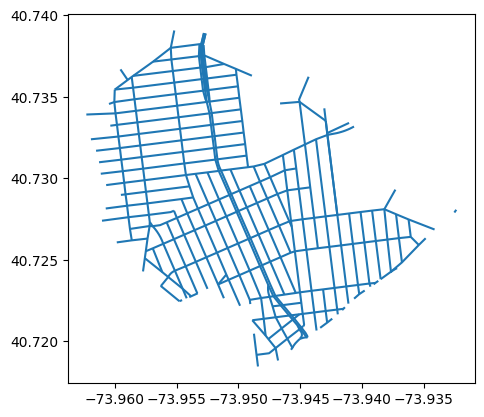

In [23]:
streets_gp.plot()

In [24]:
streets_gp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
streets_buffered = streets_gp.copy()
streets_buffered = streets_buffered.to_crs('EPSG:2263')
streets_buffered["geometry"] = streets_buffered.geometry.buffer(90)

In [26]:
streets_buffered = streets_buffered.to_crs('EPSG:4326')

In [27]:
streets_buffered.to_file('data/processed/buffered.geojson')

In [28]:
points_near_streets = gpd.sjoin(gdf, streets_buffered, how="inner", predicate="within")

In [85]:
points_near_streets.to_file('data/processed/buffered_check.geojson')

In [98]:
(points_near_streets[points_near_streets['FULLNAME'] == 'Manhattan Ave'])['spaceStatus'].value_counts()

spaceStatus
Occupied      313
Unoccupied     48
Name: count, dtype: int64

In [110]:
subway = gpd.read_file('data/raw/subway_2.geojson')

In [111]:
subway.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [112]:
points_near_streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [113]:
manhattan = gpd.overlay(points_near_streets, subway, how='intersection')

In [114]:
manhattan['spaceStatus'].value_counts()

spaceStatus
Occupied      123
Unoccupied     15
Name: count, dtype: int64

In [115]:
manhattan_2 = gpd.read_file('data/processed/manhattan_ave_unoccupied.geojson')

In [117]:
manhattan_2['spaceStatus'].value_counts()

spaceStatus
Occupied      296
Unoccupied     46
Name: count, dtype: int64

In [31]:
counts = joined.groupby(["index_right", "spaceStatus"]).size().unstack(fill_value=0)

In [32]:
counts

spaceStatus,Occupied,Unoccupied
index_right,,
1,8,0
2,22,3
5,1,0
6,13,7
7,18,0
8,13,1
9,24,4
10,39,1
11,18,3


In [33]:
streets_buffered = streets_buffered.join(counts)

In [34]:
streets_buffered[["Occupied", "Unoccupied"]] = streets_buffered[["Occupied", "Unoccupied"]].fillna(0).astype(int)

In [35]:
streets_buffered["total"] = streets_buffered["Occupied"] + streets_buffered["Unoccupied"]

In [36]:
streets_buffered["pct_unoccupied"] = streets_buffered.apply(
    lambda row: (row["Unoccupied"] / row["total"] * 100) if row["total"] > 0 else 0,
    axis=1
)

In [37]:
streets_buffered

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,Occupied,Unoccupied,total,pct_unoccupied
0,1106087924559,Humboldt St,M,S1400,"POLYGON ((-73.94468 40.72007, -73.9447 40.7200...",0,0,0,0.0
1,110422535343,Wythe Ave,M,S1400,"POLYGON ((-73.9551 40.72406, -73.95519 40.7240...",8,0,8,0.0
2,110422540147,Lorimer St,M,S1400,"POLYGON ((-73.95194 40.72339, -73.95289 40.725...",22,3,25,12.0
3,110422535854,Driggs Ave,M,S1400,"POLYGON ((-73.94903 40.7223, -73.94903 40.7223...",0,0,0,0.0
4,110422540101,Leonard St,M,S1400,"MULTIPOLYGON (((-73.94885 40.71914, -73.94906 ...",0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
82,1105045093873,John Jay Byrne Brg,M,S1400,"POLYGON ((-73.94211 40.73301, -73.94194 40.733...",0,0,0,0.0
83,1104991798629,N Henry St,M,S1400,"POLYGON ((-73.9442 40.72754, -73.94451 40.7294...",0,0,0,0.0
84,1105045093880,Greenpoint Ave,M,S1400,"POLYGON ((-73.9423 40.73322, -73.9423 40.73322...",0,0,0,0.0
85,1105045092343,Kingsland Ave,M,S1400,"POLYGON ((-73.94337 40.73426, -73.94337 40.734...",0,0,0,0.0


In [38]:
streets_buffered.to_file('data/processed/shops_streets.geojson')

In [39]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
gdf = gdf.to_crs('EPSG:2263')

In [41]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [42]:
buildings_gp = gpd.read_file('data/processed/buildings_gp.geojson')

In [43]:
buildings_gp = buildings_gp.to_crs('EPSG:2263')

In [44]:
buildings_gp.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [45]:
points_with_dist = gpd.sjoin_nearest(
    gdf.to_crs(buildings_gp.crs),
    buildings_gp,
    how="left",
    distance_col="dist_m"  # new column with distance
)

In [46]:
points_with_dist['dist_m'].describe()

count    1252.000000
mean        1.768908
std         7.400106
min         0.000000
25%         0.000000
50%         0.000000
75%         1.870281
max        93.613525
Name: dist_m, dtype: float64

In [47]:
points_with_dist.sort_values(by='dist_m', ascending=False).head(50)

,stateId,spaceStatus,placeStatus,resolvedName,subcategoriesPrimary.name,address,postcode,validityTime.start,validityTime.end,verifiedTimesLast,...,objectid,feature_code,shape_length,height_roof,last_status_type,bin,last_edited_date,geom_source,doitt_id,dist_m
647,5c645b6e7de1a00001487523,Unoccupied,NaN,NaN,NaN,855 Humboldt St,NaN,2019-02-13T18:01:15Z,NaN,2025-06-02T19:29:22Z,...,71625,2100,121.70373166878552,33,None,3330224,2018-07-05 22:05:07+00:00,Other (Manual),1285409,93.613525
538,5af5c30179502d00034c867b,Occupied,Operating,Allocco Recycling,"Business, Commercial & Professional Services",540 Kingsland Avenue,NaN,2018-05-11T16:21:20Z,NaN,2025-04-25T20:29:08Z,...,74716,2100,666.26535939845144,39.79426645,Constructed,3064104,2017-08-22 15:31:58+00:00,Photogrammetric,119921,86.983051
346,5783e80acb5f030003ab79f5,Occupied,Operating,Kinder Morgan - Brooklyn Terminal,"Business, Commercial & Professional Services",315 Norman Avenue,11222.0,2016-07-11T18:40:09Z,NaN,2025-04-25T19:58:02Z,...,310229,2100,61.45166900576907,11.83,Constructed,3332284,2009-02-14 00:00:00+00:00,Photogrammetric,1050922,82.795469
540,5af5c54379502d00034c89d3,Occupied,Operating,Edge Auto Rental,Transportation,460 Kingsland Avenue,11222.0,2018-05-11T16:30:58Z,NaN,2025-04-25T20:30:09Z,...,922842,2100,396.225362174176,23.66158005,Constructed,3337729,2017-08-22 15:55:04+00:00,Photogrammetric,22859,79.953039
579,5b74a8891e717700038261d7,Unoccupied,NaN,NaN,NaN,16 Dupont St,NaN,2018-08-15T22:26:15Z,NaN,2025-06-03T20:01:36Z,...,1077436,2100,54.40204170730896,12.30880964,Constructed,3422314,2023-12-11 18:12:21+00:00,Photogrammetric,1271904,74.273408
933,6492b6d1017b1b0001a82b7a,Occupied,Operating,Bolla,"Business, Commercial & Professional Services",497 Meeker Avenue,11222.0,2023-06-21T08:37:30Z,NaN,2025-04-25T22:24:05Z,...,1039336,2100,89.091771758203677,34.96,Constructed,3067995,2017-08-22 15:37:52+00:00,Photogrammetric,272442,68.260242
958,64da6b072b19e70001122c5c,Occupied,Operating,Empire Recycling Services,Recycling Center,120 Hausman Street,11222.0,2023-08-14T17:57:26Z,NaN,2025-04-25T19:57:53Z,...,959269,2100,358.08387458529756,34.32,Constructed,3337979,2017-08-22 15:16:42+00:00,Photogrammetric,258182,60.709884
667,5c671c8497bc1c00010682a8,Occupied,Operating,The Lot Radio,Coffee & Tea,17 Nassau Ave,11222.0,2019-02-15T20:09:39Z,NaN,2025-06-02T21:43:53Z,...,1089001,2100,291.53249543706539,45,Constructed,3426322,2024-08-30 16:36:54+00:00,Other (Manual),1302455,58.214321
199,56705cfbc24d6c0003002ede,Occupied,Operating,Sonomax,Gas Station,278 Greenpoint Avenue,NaN,2015-12-15T18:33:31Z,NaN,2025-06-02T19:31:57Z,...,59604,2100,76.205456582544841,17,Constructed,3330219,2017-08-22 15:47:14+00:00,Other (Manual),1085931,51.981827
374,57841fb218009e0003a669aa,Occupied,Operating,Gulf,Gas Station,321 McGuinness Blvd,11222.0,2016-07-11T22:37:38Z,NaN,2025-06-16T21:39:57Z,...,1807,2100,75.126929526500817,13.72,Constructed,3064194,2017-08-22 15:47:16+00:00,Photogrammetric,851852,48.730674


In [56]:
points_final = gpd.sjoin_nearest(
    gdf.to_crs(buildings_gp.crs),
    buildings_gp,
    how="left",
    max_distance=10,  # new column with distance
    distance_col="dist_m"
)

<Axes: >

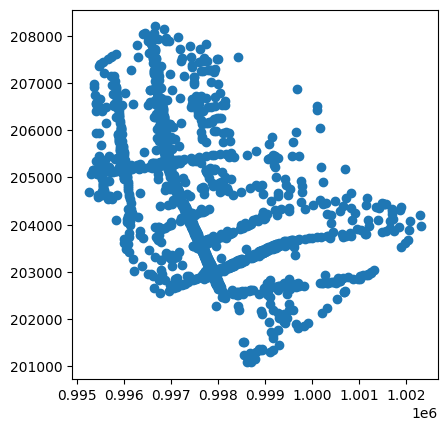

In [57]:
points_final.plot()

In [58]:
buildings_gp['objectid']

0        910297
1        212107
2        110256
3       1061470
4        132494
         ...   
5142     535712
5143     622814
5144     797671
5145    1078010
5146      81401
Name: objectid, Length: 5147, dtype: object

In [59]:
points_final.columns

Index(['stateId', 'spaceStatus', 'placeStatus', 'resolvedName',
       'subcategoriesPrimary.name', 'address', 'postcode',
       'validityTime.start', 'validityTime.end', 'verifiedTimesLast',
       'verifiedTimes', 'placeId', 'placeCreationDate', 'spaceId',
       'spaceCreationDate', 'entrances.main.lat', 'entrances.main.lon',
       'entrances.main.floor', 'entrances.main.entranceMethod', 'hours', 'tel',
       'emails', 'urls.website', 'urls.facebook', 'urls.instagram',
       'urls.menu', 'urls.contact', 'urls.liveWeb', 'slug', 'description',
       'name_left', 'genericName.id', 'genericName.name', 'chain.chainId',
       'chain.name', 'chain.urls.website', 'parent.placeId', 'parent.name',
       'parent.subcategoriesPrimary.id', 'parent.subcategoriesPrimary.name',
       'tagsPrimary.id', 'tagsPrimary.name', 'subcategoriesPrimary.id',
       'categoriesPrimary.id', 'categoriesPrimary.name', 'tags.id',
       'tags.name', 'subcategories.id', 'subcategories.name', 'categories.id'

In [60]:
points_final['objectid']

0        258674
1        375276
2        755762
3        573931
4        707556
         ...   
1247     712265
1248    1089858
1249     999287
1250     844191
1251     611383
Name: objectid, Length: 1252, dtype: object

In [65]:
buildings_matched = buildings_gp.merge(
    points_final[['objectid', 'dist_m', 'address', 'spaceStatus', 'resolvedName']],  # keep only needed cols from points
    on='objectid',
    how='outer'
)

<Axes: >

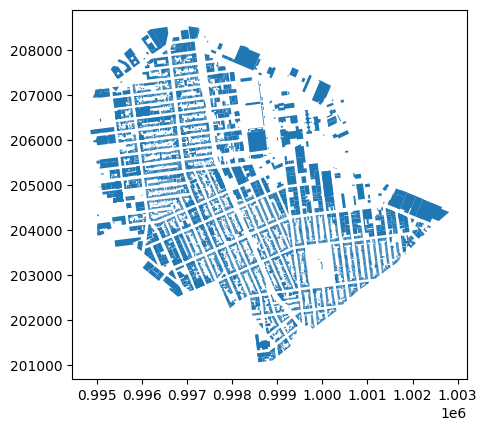

In [66]:
buildings_matched.plot()

In [69]:
buildings_matched.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [70]:
buildings_matched = buildings_matched.to_crs('EPSG:4326')

In [76]:
buildings_matched['address'].

1227

In [71]:
buildings_matched.to_file('data/processed/Building_unoccupied.geojson')

In [77]:
len(buildings_gp)

5147

In [84]:
len(gdf)

1252

In [81]:
gdf.columns

Index(['stateId', 'spaceStatus', 'placeStatus', 'resolvedName',
       'subcategoriesPrimary.name', 'address', 'postcode',
       'validityTime.start', 'validityTime.end', 'verifiedTimesLast',
       'verifiedTimes', 'placeId', 'placeCreationDate', 'spaceId',
       'spaceCreationDate', 'entrances.main.lat', 'entrances.main.lon',
       'entrances.main.floor', 'entrances.main.entranceMethod', 'hours', 'tel',
       'emails', 'urls.website', 'urls.facebook', 'urls.instagram',
       'urls.menu', 'urls.contact', 'urls.liveWeb', 'slug', 'description',
       'name', 'genericName.id', 'genericName.name', 'chain.chainId',
       'chain.name', 'chain.urls.website', 'parent.placeId', 'parent.name',
       'parent.subcategoriesPrimary.id', 'parent.subcategoriesPrimary.name',
       'tagsPrimary.id', 'tagsPrimary.name', 'subcategoriesPrimary.id',
       'categoriesPrimary.id', 'categoriesPrimary.name', 'tags.id',
       'tags.name', 'subcategories.id', 'subcategories.name', 'categories.id',
   

In [82]:
gdf['spaceStatus'].value_counts()

spaceStatus
Occupied      1107
Unoccupied     145
Name: count, dtype: int64

In [119]:
ma_wb = gpd.read_file('data/processed/Manhattanave_williamsburg.geojson')

In [124]:
ma_wb['spaceStatus'].value_counts()

spaceStatus
Occupied      132
Unoccupied     20
Name: count, dtype: int64